# K-Means Clustering- Online Retail Data

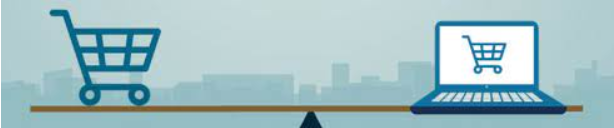

Overview:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

https://archive.ics.uci.edu/dataset/352/online+retail

Objectives:

1. Identify distinct customer segments for targeting them based on RFM scores.
2. Categorize customers into high-value, mid-tier, and low-value groups.

Steps: 
1) Read and understand data
2) Data Cleaning
3) Prepare data for modelling
4) Modelling
5) Final Analysis and recommendation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings ('ignore')

### 1. Read and understand data

In [2]:
# Read the data

df= pd.read_csv('Online+Retail.csv', sep=',', encoding='ISO-8859-1', header=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# Rows & Columns
df.shape

(541909, 8)

In [4]:
# Basic Data check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Basic statistical Overview

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 2. Data Cleaning

In [6]:
# Checking missing Values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Missing Values in percentage

df.isna().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
# 2 columns having nulls, 'Description' having very less, 
# 'CustomerID' having 24% nulls, we canot feel unique ID here
# So, We decided to remove 

In [9]:
# Dropping rows having null values

df.dropna(axis=0, inplace=True)
df.shape

(406829, 8)

- 406829 rows after dropping rows

In [10]:
# Duplicate Rows checking

df_copy  = df.copy()
duplicate_mask  = df_copy.duplicated()


print('duplicated:', duplicate_mask.sum())

#Duplicated rows
df_copy[duplicate_mask].head()

duplicated: 5225


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom


-  There are 5225 duplicated.

In [11]:
# Now we need to remove duplicate, except 'first' of duplicated

df = df.drop_duplicates(keep='first')
df.shape

(401604, 8)

In [12]:
# Data Type inconsistancies check

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


- All data type having in correct data type

In [13]:
# Max Date
df['InvoiceDate'].max()

'31-10-2011 17:13'

In [14]:
# Min Date
df['InvoiceDate'].min()

'01-02-2011 08:23'

- This data is for less than a year

In [15]:
# Creating new column 'Amount' using the Quantity and UnitPrice

df['Amount']= df['Quantity']*df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00


# 3. Prepare the data for modelling

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [16]:
# M (Monetary)
monetary = df.groupby('CustomerID')['Amount'].sum().reset_index()
monetary.columns = columns=['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [17]:
# Frequency

frequency = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [18]:
# Recency

# First need to convert 'InvoiceDate' to datetim format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [19]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
# Max_Date 

Max_Date = df['InvoiceDate'].max()
Max_Date

Timestamp('2011-12-09 12:50:00')

In [21]:
# Differance in days from recent date/max_date
df['Diff_Days'] = Max_Date - df['InvoiceDate']
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff_Days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [22]:
# Recency
recency = df.groupby('CustomerID')['Diff_Days'].max().reset_index()
recency.head()

,CustomerID,Diff_Days
0,12346.0,325 days 02:49:00
1,12347.0,366 days 21:53:00
2,12348.0,357 days 17:41:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [23]:
# Recency in days
recency['Diff_Days'] = recency['Diff_Days'].dt.days
recency.columns =['CustomerID', 'Recency']
recency.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,366
2,12348.0,357
3,12349.0,18
4,12350.0,309


In [24]:
# Merging 3 dataframes together

df_rfm = recency.merge(frequency, on= 'CustomerID').merge(monetary, on='CustomerID')
df_rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,366,182,4310.00
2,12348.0,357,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [25]:
df_rfm.shape

(4372, 4)

In [26]:
# describe
df_rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,224.779048,91.858188,1893.531433
std,1722.390705,118.412473,229.223566,8218.696204
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,114.000000,17.000000,291.795000
50%,15300.500000,252.000000,41.000000,644.070000
75%,16778.250000,331.000000,99.250000,1608.335000
max,18287.000000,373.000000,7812.000000,279489.020000


In [27]:
# Column Names
df_rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

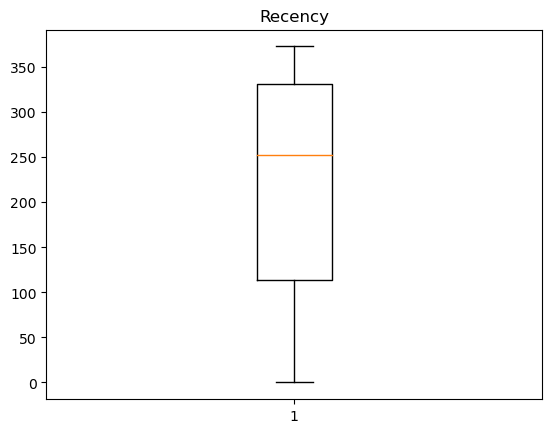

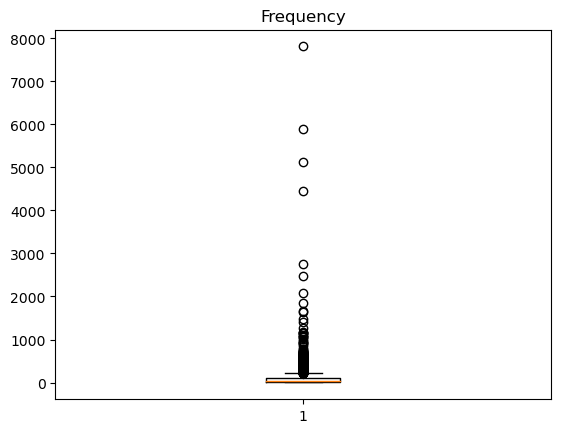

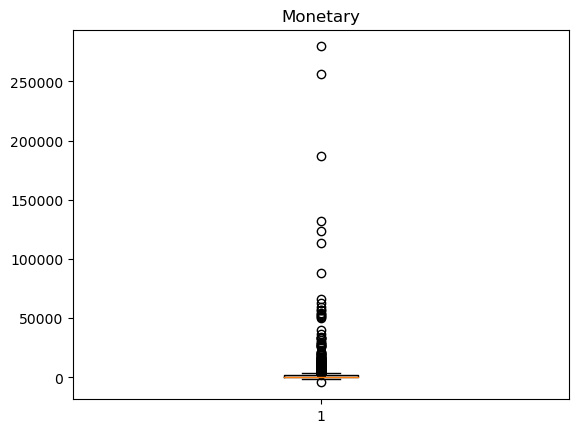

In [28]:
# Box plot to see speadness and outlier
col = ['Recency', 'Frequency', 'Monetary']

for i in col:
    
    plt.boxplot(df_rfm[i])
    plt.title(i)
    plt.show()
   

-  These box plot shows that there are outlier present in dataset.

In [29]:
# Outlier Treatment using IQR

# Recency
Q1 = df_rfm.Recency.quantile(0.05)
Q3 = df_rfm.Recency.quantile(0.95)
IQR = Q3-Q1
df_rfm = df_rfm[(df_rfm.Recency >= Q1 - 1.5*IQR) & (df_rfm.Recency <= Q3+1.5*IQR)]

# Frequency
Q1 = df_rfm.Frequency.quantile(0.05)
Q2 = df_rfm.Frequency.quantile(0.95)
IQR = Q3-Q1
df_rfm = df_rfm[(df_rfm.Frequency >= Q1 - 1.5*IQR) & (df_rfm.Frequency <= Q3+1.5*IQR)]


#Monetary
Q1 = df_rfm.Monetary.quantile(0.05)
Q2 = df_rfm.Monetary.quantile(0.95)
IQR = Q3-Q1
df_rfm = df_rfm [(df_rfm.Monetary >= Q1 - 1.5*IQR) & (df_rfm.Monetary <= Q3 + 1.5*IQR )]

In [30]:
# Shape of data
df_rfm.shape

(2443, 4)

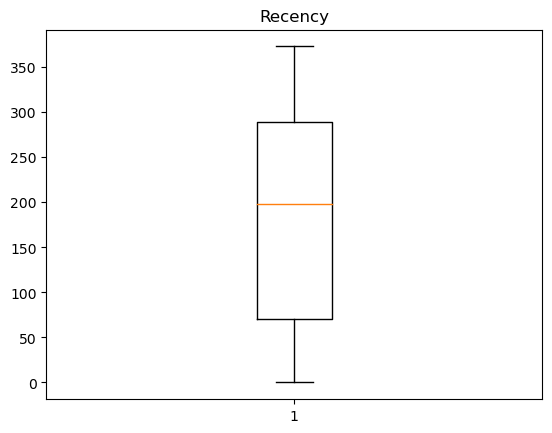

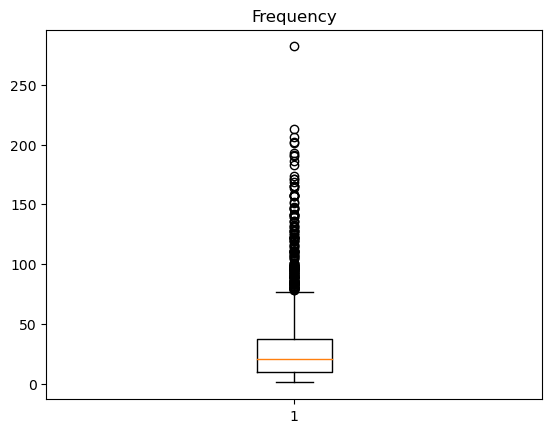

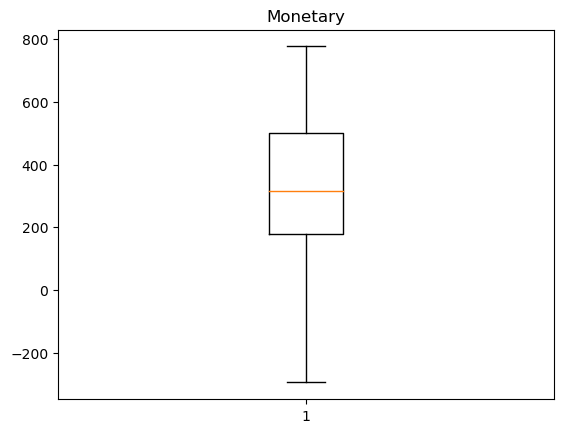

In [31]:
# Check >> Box plot to see spreadness and outlier
col = ['Recency', 'Frequency', 'Monetary']

for i in col:
    
    plt.boxplot(df_rfm[i])
    plt.title(i)
    plt.show()

- Now all outlier are cleaned from dataset

In [32]:
df_rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [33]:
# Taking only 'Recency', 'Frequency', 'Monetary' for scaler

rfm = df_rfm[['Recency', 'Frequency', 'Monetary']]
rfm.head()

,Recency,Frequency,Monetary
0,325,2,0.0
4,309,17,334.4
6,203,4,89.0
8,213,13,459.4
14,286,10,189.9


In [34]:
# Rescaling data
scaler = StandardScaler()
         
# fit_transform

rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled.shape

(2443, 3)

In [35]:
# To Dataframe

rfm_scaled_df = pd.DataFrame(rfm_scaled)
rfm_scaled_df.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,1.139060,-0.918448,-1.704434
1,1.004981,-0.423979,-0.058661
2,0.116705,-0.852519,-1.266414
3,0.200505,-0.555838,0.556536
4,0.812242,-0.654731,-0.769828


# 4. Modelling

In [36]:
# help(KMeans)

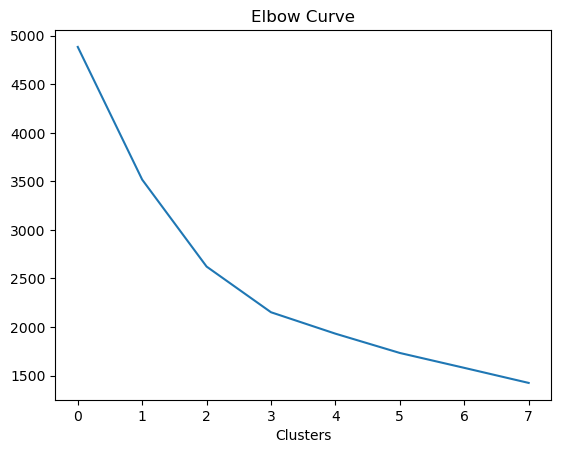

In [37]:
# Before going to KMeans clustering, need to find optimal numbers of clusters

# Elbow Curve/ SDD

ssd = []

clusters = range(2,10)

for i in clusters:
    kmeans = KMeans(n_clusters= i, max_iter=50)
    kmeans.fit(rfm_scaled_df)
    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)
plt.xlabel('Clusters')
plt.title('Elbow Curve')
plt.show()


-  Observation: 3 is optimal numbers of clusters

In [38]:
# Silhouette Score

# Silhouette Score to confirm number of clusters

In [39]:
# silhouette analysis

clusters_Range = range(2,10)

for i in clusters_Range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(rfm_scaled_df)

    cluster_labels = kmeans.labels_

    Silhouette_avg = silhouette_score(rfm_scaled_df, cluster_labels)
    print (i,':', Silhouette_avg )

2 : 0.3424035200273868
3 : 0.341343055031508
4 : 0.3649119817609069
5 : 0.3465468201634954
6 : 0.31809713168822157
7 : 0.3530217450431126
8 : 0.3306515687898305
9 : 0.299116010610403


- So we are confirm on cluster number 3.

In [40]:
# Model with  k = 3

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled_df)

KMeans(max_iter=50, n_clusters=3)

In [41]:
# Result
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 0])

In [42]:
# Adding to main dataframe

df_rfm['Cluster_ID'] = kmeans.labels_
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_ID
0,12346.0,325,2,0.0,2
4,12350.0,309,17,334.4,2
6,12353.0,203,4,89.0,2
8,12355.0,213,13,459.4,2
14,12361.0,286,10,189.9,2


In [43]:
# Count of values in each cluster

df_rfm.Cluster_ID.value_counts()

Cluster_ID
0    902
2    867
1    674
Name: count, dtype: int64

In [44]:
df_rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster_ID'], dtype='object')

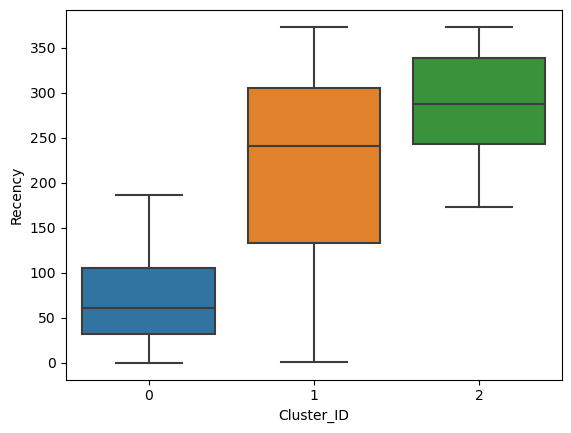

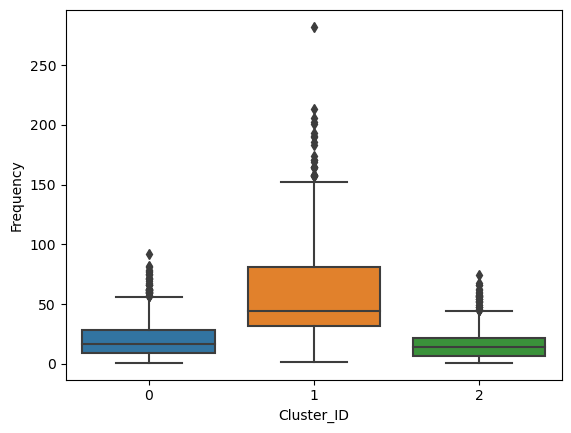

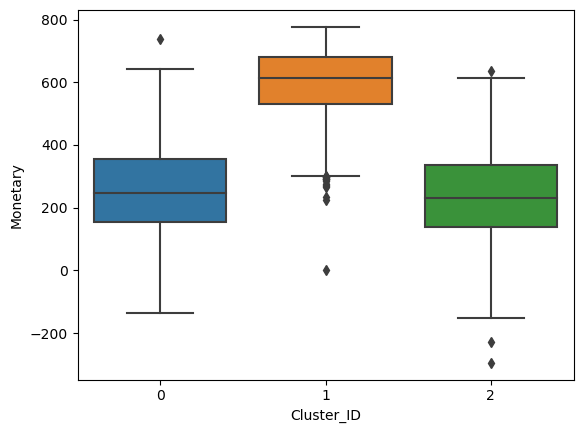

In [45]:
# Box plot

col = ['Recency', 'Frequency', 'Monetary']
for i in col:
    sns.boxplot(df_rfm, x='Cluster_ID', y=i)
    plt.show()

### Hierarchical Clustering

In [46]:
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_ID
0,12346.0,325,2,0.0,2
4,12350.0,309,17,334.4,2
6,12353.0,203,4,89.0,2
8,12355.0,213,13,459.4,2
14,12361.0,286,10,189.9,2


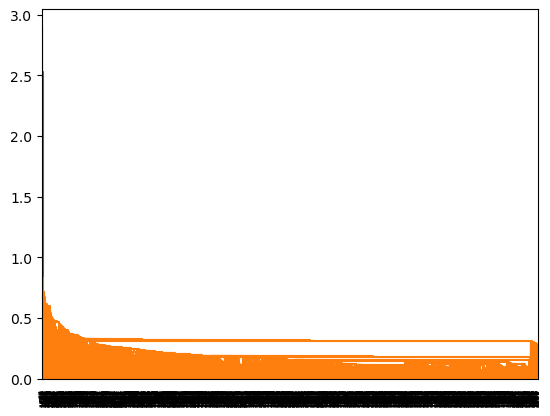

In [47]:
# single linkage
mergings = linkage(rfm_scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

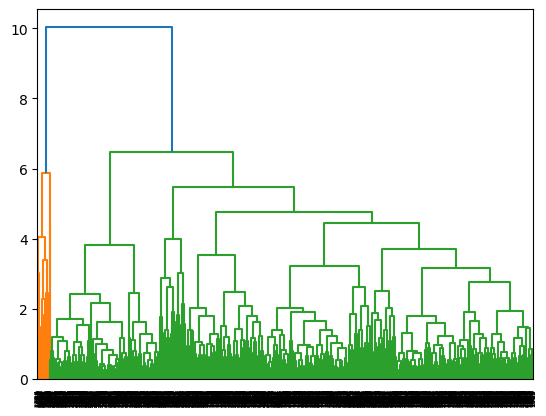

In [48]:
# complete linkage

mergings = linkage(rfm_scaled_df, method= 'complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [49]:
# 3 cluster

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 1, 0, 0])

In [50]:
# Assign the cluster labels

df_rfm['Cluster_Labels'] = cluster_labels
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_ID,Cluster_Labels
0,12346.0,325,2,0.0,2,0
4,12350.0,309,17,334.4,2,1
6,12353.0,203,4,89.0,2,0
8,12355.0,213,13,459.4,2,1
14,12361.0,286,10,189.9,2,1


In [51]:
df_rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster_ID',
       'Cluster_Labels'],
      dtype='object')

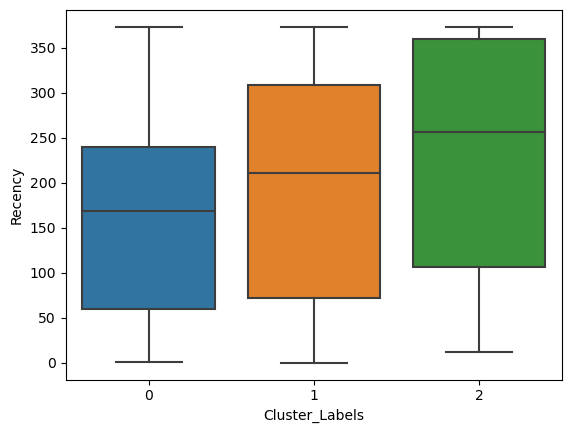

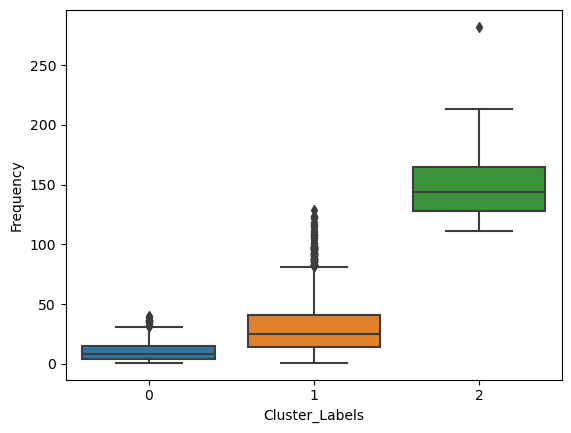

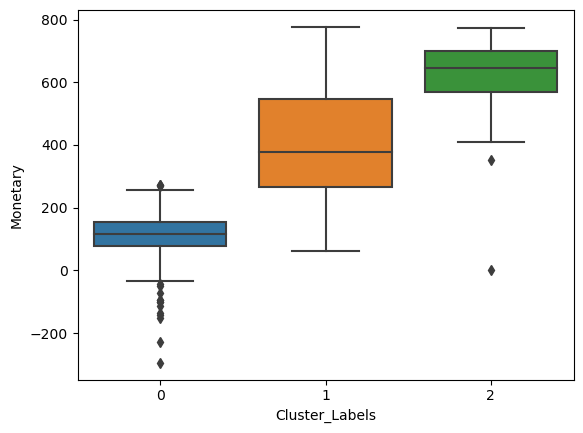

In [52]:
# Box Plot

col = ['Recency', 'Frequency', 'Monetary']

for i in col:
    sns.boxplot(df_rfm,x= 'Cluster_Labels', y= i)
    plt.show()

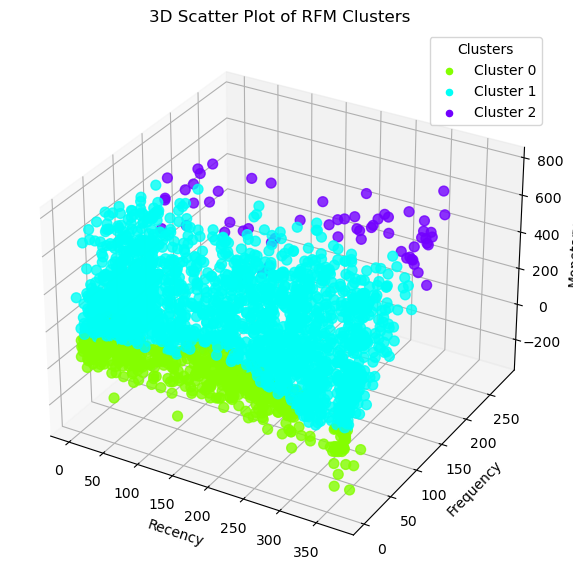

In [53]:
# 3D Plot of Data

from mpl_toolkits.mplot3d import Axes3D

# Create a color palette based on the number of unique clusters
unique_clusters = df_rfm['Cluster_Labels'].nunique()
palette = sns.color_palette("hsv", unique_clusters)
color_map = {cluster: palette[i] for i, cluster in enumerate(df_rfm['Cluster_Labels'].unique())}

# Assign colors based on Cluster_Labels
colors = df_rfm['Cluster_Labels'].map(color_map)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_rfm['Recency'], df_rfm['Frequency'], df_rfm['Monetary'], 
                c=colors, s=50, alpha=0.8)

# Labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of RFM Clusters')

# Creating legend manually
for cluster, color in color_map.items():
    ax.scatter([], [], [], c=[color], label=f'Cluster {cluster}')
ax.legend(title='Clusters')

plt.show()


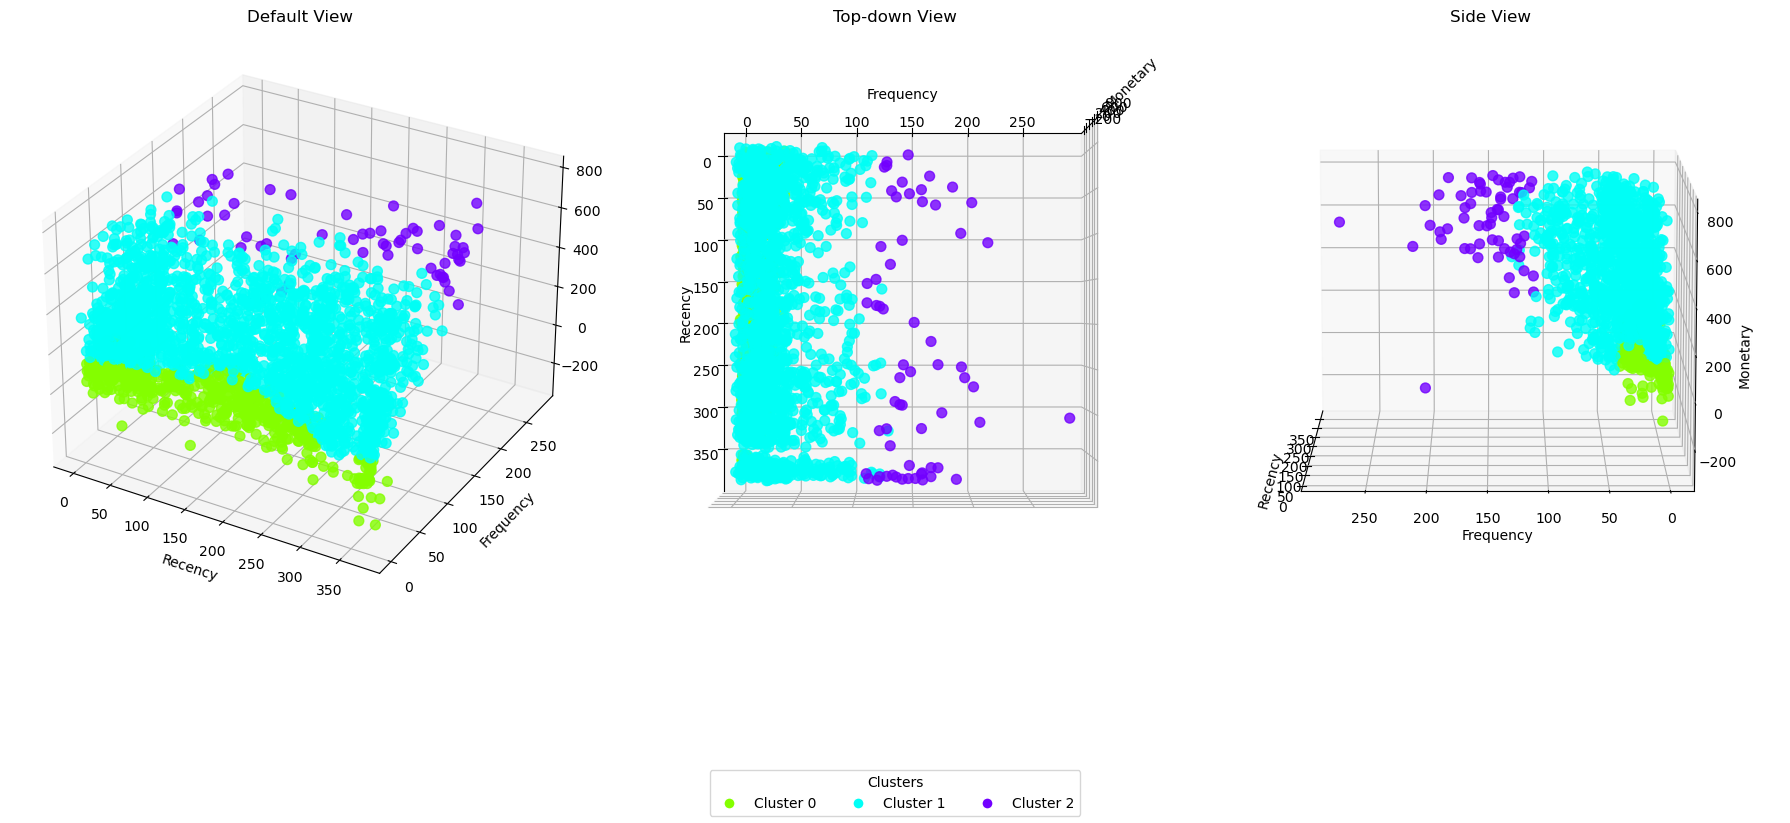

In [54]:
# 3D in 3 view

from mpl_toolkits.mplot3d import Axes3D


# color palette for clusters
unique_clusters = df_rfm['Cluster_Labels'].unique()  # Get unique cluster labels
palette = sns.color_palette("hsv", len(unique_clusters))  # Generate colors
color_map = {cluster: palette[i] for i, cluster in enumerate(unique_clusters)}  # Assign colors
colors = df_rfm['Cluster_Labels'].map(color_map)  # Map colors to dataframe

# subplots
fig = plt.figure(figsize=(18, 10))

# View 1: Default Perspective
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_rfm['Recency'], df_rfm['Frequency'], df_rfm['Monetary'], c=colors, s=50, alpha=0.8)
ax1.set_title("Default View")
ax1.set_xlabel("Recency")
ax1.set_ylabel("Frequency")
ax1.set_zlabel("Monetary")

# View 2: Top-down View
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df_rfm['Recency'], df_rfm['Frequency'], df_rfm['Monetary'], c=colors, s=50, alpha=0.8)
ax2.view_init(elev=90, azim=0)  # Top-down view
ax2.set_title("Top-down View")
ax2.set_xlabel("Recency")
ax2.set_ylabel("Frequency")
ax2.set_zlabel("Monetary")

# View 3: Side View
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df_rfm['Recency'], df_rfm['Frequency'], df_rfm['Monetary'], c=colors, s=50, alpha=0.8)
ax3.view_init(elev=10, azim=180)  # Side view
ax3.set_title("Side View")
ax3.set_xlabel("Recency")
ax3.set_ylabel("Frequency")
ax3.set_zlabel("Monetary")

#  legend 
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f'Cluster {cluster}')
           for cluster, color in color_map.items()]
fig.legend(handles=handles, title="Clusters", loc='lower center', ncol=min(len(color_map), 5))  # Limit columns for readability

plt.tight_layout()
plt.show()



In [55]:
# Compute summary statistics for each cluster
cluster_summary = df_rfm.groupby("Cluster_Labels")[["Recency", "Frequency", "Monetary"]].agg(['mean', 'median', 'min', 'max']).reset_index()
cluster_summary


Cluster_Labels     Recency                   Frequency                   \
                        mean median min  max        mean median  min  max   
0              0  160.347584  169.0   1  373   11.046468    8.0    1   40   
1              1  196.190450  211.0   0  373   31.287032   25.0    1  129   
2              2  226.774194  256.0  12  373  150.758065  144.0  111  282   

     Monetary                                 
         mean   median           min     max  
0  109.717584  116.105 -2.950900e+02  272.07  
1  406.158146  376.720  6.175000e+01  777.20  
2  620.645968  644.080  3.552714e-15  773.55

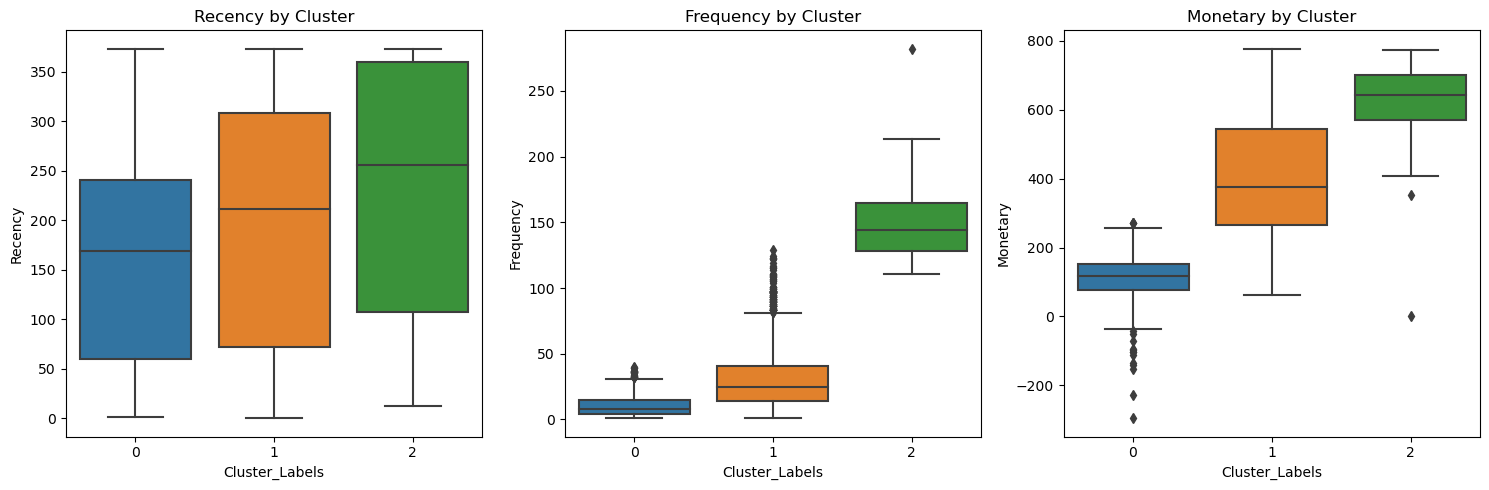

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Recency
sns.boxplot(x="Cluster_Labels", y="Recency", data=df_rfm, ax=axes[0])
axes[0].set_title("Recency by Cluster")

# Frequency
sns.boxplot(x="Cluster_Labels", y="Frequency", data=df_rfm, ax=axes[1])
axes[1].set_title("Frequency by Cluster")

# Monetary
sns.boxplot(x="Cluster_Labels", y="Monetary", data=df_rfm, ax=axes[2])
axes[2].set_title("Monetary by Cluster")

plt.tight_layout()
plt.show()


## Cluster-wise Characteristics and Insights


### **Cluster 0 – High Recency | Low Frequency | Low Monetary**
- Customers have a **high Recency** (haven't purchased recently).
- **Low Frequency** means they don’t buy often.
- **Low Monetary** indicates they spend less.

- **Action:**  
  - Re-engagement campaigns.  
  - Targeted discounts.  
  - Personalized product recommendations.



### **Cluster 1  – Medium Recency | Medium Frequency | Medium Monetary**
- Customers purchase **moderately often** and spend a **medium amount**.
- **Recency is better** than Cluster 0, but not as strong as Cluster 2.
- **Action:**  
  - Encourage repeat purchases with personalized offers.  
  - Loyalty programs or subscription-based models.  
  - Targeted promotions to increase engagement.



### **Cluster 2  – Low Recency | High Frequency | High Monetary**
- **Best customers**: They buy frequently and spend a high amount.
- **Low Recency** means they’ve purchased recently.
- **Action:**  
  - VIP benefits & priority support.  
  - Early access to deals & exclusive discounts.  
  - Retention strategies to keep them engaged.
